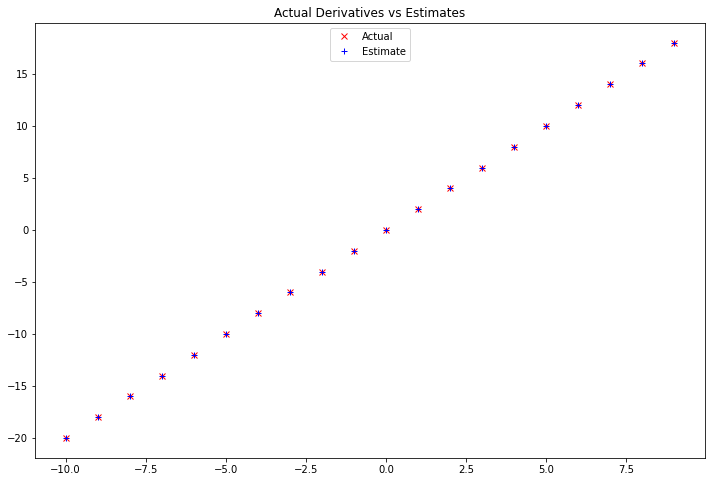

In [1]:
import math
import matplotlib.pyplot as plt
import random as r
from functools import partial

def sum_of_squares(vector):
    return sum(i ** 2 for i in vector)

def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h # basic derivation formula while h -> 0

def square(x):
    return x * x

def square_derivative(x):
    return 2 * x


""" x2 = 100
square_derivative(math.sqrt(x2)) """

derivative_estimate = partial(difference_quotient, square, h=0.00001)
x = range(-10, 10)

plt.figure(figsize=(12,8))
plt.title("Actual Derivatives vs Estimates")
plt.plot(x, list(map(square_derivative, x)), 'rx', label='Actual')
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()




In [2]:
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

In [3]:
# using the gradient
def distance(current, before):
    return math.sqrt(sum([(c - b) ** 2 for c, b in zip(current, before)]))

print(distance([0, 0], [3, 4]))

def step(v, direction, step_size):
    """ v = [0.43, 1.2, 5.3, -0.6, 7.7]
    direction = [0, 0, 1, 1, 0]
    returning = [[0, 0, 5.3, -0.6, 0]] """
    return [vi + step_size * direction_i for vi, direction_i in zip(v, direction)]

def sumof_squares_gradient(v):
    return [2 * vi for vi in v]

v = [r.randint(-10, 10) for i in range(3)]

tolerance = 0.00000001

while True:
    graident = sumof_squares_gradient(v)
    next_v = step(v, graident, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
print('It\'s all good here and v is', v)

def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return(float('inf'))
    return safe_f

5.0
It's all good here and v is [2.7149624797165326e-07, 6.787406199291331e-08, 4.0724437195748023e-07]


In [6]:
# putting all together
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):

    step_sizes = [100 / 10**x for x in range(8)]

    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]

        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        if distance(value, next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in -f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
        negate_all(gradient_fn),
        theta_0,
        tolerance
        )


In [ ]:
# stochastic gradient descent
def in_random_order(data):
    # generator that returns the elements of data in random order
    indexes = range(len(data))
    r.shuffle(indexes)
    for i in indexes:
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = zip(x, y)
    theta = theta_0
    alpha = alpha_0

    min_theta, min_value = None, float('inf')
    iterations_with_no_improvement = 0

    while iterations_with_no_improvement < 100:
        value = sum(target_fn(xi, yi, theta) for xi, yi in data)

        if value < min_value:
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9

        for xi, yi in in_random_order(data):
            gradient_i = gradient_fn(xi, yi, theta)
            theta = vector_substract(theta, scalar_multiply(alpha, gradient_i))

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
        negate_all(gradient_fn),
        x, y, theta_0, alpha_0    
    )





